# KE5018 Time Series Forecasting

## Load Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

## Load Data

In [2]:
train_ts_df = pd.read_csv('data/transformedTrainRatings.csv', index_col=0, parse_dates=True)
train_ts_df['ln GRP'] = np.log(train_ts_df['GRP'])
train_ts_df.head()

,week,GRPRatingsDate,GRP,ln GRP
weekly_date,,,,
2007-06-17,0,17-Jun-2007 (25),243.60,5.495528
2007-06-24,1,24-Jun-2007 (26),263.19,5.572876
2007-07-01,2,01-Jul-2007 (27),269.89,5.598014
2007-07-08,3,08-Jul-2007 (28),252.88,5.532915
2007-07-15,4,15-Jul-2007 (29),303.46,5.715250


In [3]:
test_ts_df = pd.read_csv('data/transformedTestRatings.csv', index_col=0, parse_dates=True)
test_ts_df['ln GRP'] = np.log(test_ts_df['GRP'])
test_ts_df.head()

,week,GRPRatingsDate,GRP,ln GRP
weekly_date,,,,
2008-06-22,53,22-Jun-2008 (26),214.32,5.367470
2008-06-29,54,29-Jun-2008 (27),233.76,5.454295
2008-07-06,55,06-Jul-2008 (28),231.12,5.442937
2008-07-13,56,13-Jul-2008 (29),224.72,5.414855
2008-07-20,57,20-Jul-2008 (30),216.19,5.376158


## Holt's Trend Corrected Two Parameter Exponential Smoothing

In [4]:
# For storing model results
results_list = []

### Use StatsModels to find the optimal weights for alpha and beta

In [5]:
# smoothing level = alpha (level), smoothing slope = beta (growth rate)
# The model will automatically optimize the value.
holt_train = sm.tsa.Holt(train_ts_df['ln GRP'].values, exponential=True, damped=True).fit(optimized=True)
holt_train

In [6]:
holt_train.params

{'damping_slope': 0.72502865115966786,
 'initial_level': 5.4285249109607143,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 1.0132791866283264,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.56708488028061155,
 'smoothing_seasonal': nan,
 'smoothing_slope': 0.0,
 'use_boxcox': False}

### Manually Adjust Apha and Beta 

In [7]:
train_ts_df.tail()

,week,GRPRatingsDate,GRP,ln GRP
weekly_date,,,,
2008-05-18,48,18-May-2008 (21),227.32,5.426359
2008-05-25,49,25-May-2008 (22),218.16,5.385229
2008-06-01,50,01-Jun-2008 (23),228.92,5.433373
2008-06-08,51,08-Jun-2008 (24),231.79,5.445832
2008-06-15,52,15-Jun-2008 (25),231.19,5.443240


In [8]:
holt_test = sm.tsa.Holt(test_ts_df['ln GRP'].values,
                        exponential=True,
                        damped=True).fit(smoothing_level=holt_train.params['smoothing_level'],
                                         smoothing_slope=holt_train.params['smoothing_slope'],
                                         damping_slope=holt_train.params['damping_slope'],
                                         optimized=False)
holt_test

In [9]:
holt_test.params

{'damping_slope': 0.72502865115966786,
 'initial_level': 5.3674702252363531,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 1.0117022288216138,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.56708488028061155,
 'smoothing_seasonal': None,
 'smoothing_slope': 0.0,
 'use_boxcox': False}

In [10]:
train_ts_df['holt'] = np.exp(holt_train.predict(0, len(train_ts_df)-1))
train_ts_df.head()

,week,GRPRatingsDate,GRP,ln GRP,holt
weekly_date,,,,,
2007-06-17,0,17-Jun-2007 (25),243.60,5.495528,240.013393
2007-06-24,1,24-Jun-2007 (26),263.19,5.572876,251.464691
2007-07-01,2,01-Jul-2007 (27),269.89,5.598014,265.373044
2007-07-08,3,08-Jul-2007 (28),252.88,5.532915,273.451519
2007-07-15,4,15-Jul-2007 (29),303.46,5.715250,265.470810


In [11]:
test_ts_df['holt'] = np.exp(holt_test.predict(start=0, end=len(test_ts_df)-1))
test_ts_df.head()

,week,GRPRatingsDate,GRP,ln GRP,holt
weekly_date,,,,,
2008-06-22,53,22-Jun-2008 (26),214.32,5.367470,224.289439
2008-06-29,54,29-Jun-2008 (27),233.76,5.454295,225.924552
2008-07-06,55,06-Jul-2008 (28),231.12,5.442937,235.970829
2008-07-13,56,13-Jul-2008 (29),224.72,5.414855,237.337819
2008-07-20,57,20-Jul-2008 (30),216.19,5.376158,233.036761


In [12]:
test_ts_df['holt-outofsample'] = np.exp(holt_train.predict(start=len(train_ts_df), end=len(train_ts_df) + len(test_ts_df)-1))
test_ts_df.tail()

,week,GRPRatingsDate,GRP,ln GRP,holt,holt-outofsample
weekly_date,,,,,,
2009-02-15,87,15-Feb-2009 (8),204.20,5.319100,205.168253,230.244622
2009-02-22,88,22-Feb-2009 (9),200.61,5.301363,204.618728,230.244622
2009-03-01,89,01-Mar-2009 (10),208.56,5.340227,202.335793,230.244622
2009-03-08,90,08-Mar-2009 (11),191.74,5.256140,205.842346,230.244622
2009-03-15,91,15-Mar-2009 (12),222.07,5.402993,197.722516,230.244622


In [13]:
holt_train_mse = mean_squared_error(train_ts_df['GRP'].values, train_ts_df['holt'].values)
holt_train_rmse = np.sqrt(holt_train_mse)
holt_test_mse = mean_squared_error(test_ts_df['GRP'].values, test_ts_df['holt'].values)
holt_test_rmse = np.sqrt(holt_test_mse)

results_list.append([holt_train_mse, holt_train_rmse, holt_test_mse, holt_test_rmse])

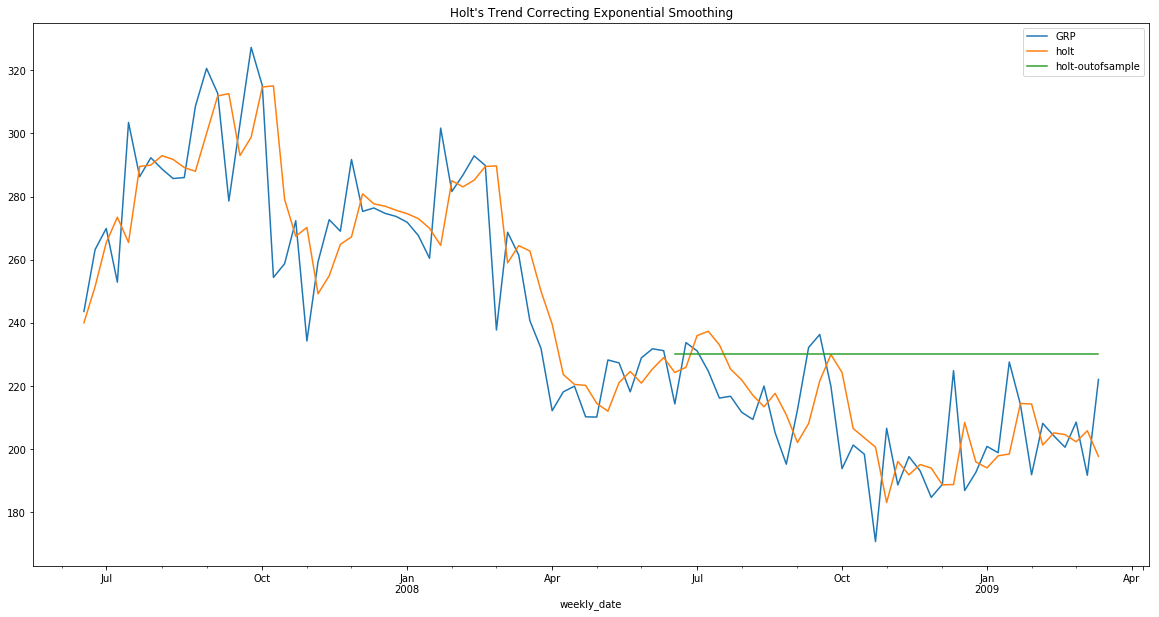

In [14]:
new_ts_df = train_ts_df.append(test_ts_df)
new_ts_df[['GRP', 'holt', 'holt-outofsample']].plot(figsize=(20, 10), title="Holt's Trend Correcting Exponential Smoothing")

In [15]:
residuals = train_ts_df['GRP'].values - train_ts_df['holt']
residuals[:10]

weekly_date
2007-06-17     3.586607
2007-06-24    11.725309
2007-07-01     4.516956
2007-07-08   -20.571519
2007-07-15    37.989190
2007-07-22    -3.223076
2007-07-29     2.325732
2007-08-05    -4.221242
2007-08-12    -6.046293
2007-08-19    -3.158147
Name: holt, dtype: float64

In [16]:
holt_res = Pipeline(
    [
        ('poly', PolynomialFeatures(degree=3)),
        ('linear', LinearRegression(fit_intercept=False))])
holt_res.fit(train_ts_df['week'].values.reshape(-1, 1), residuals)
holt_res_pred = holt_res.predict(train_ts_df['week'].values.reshape(-1, 1))

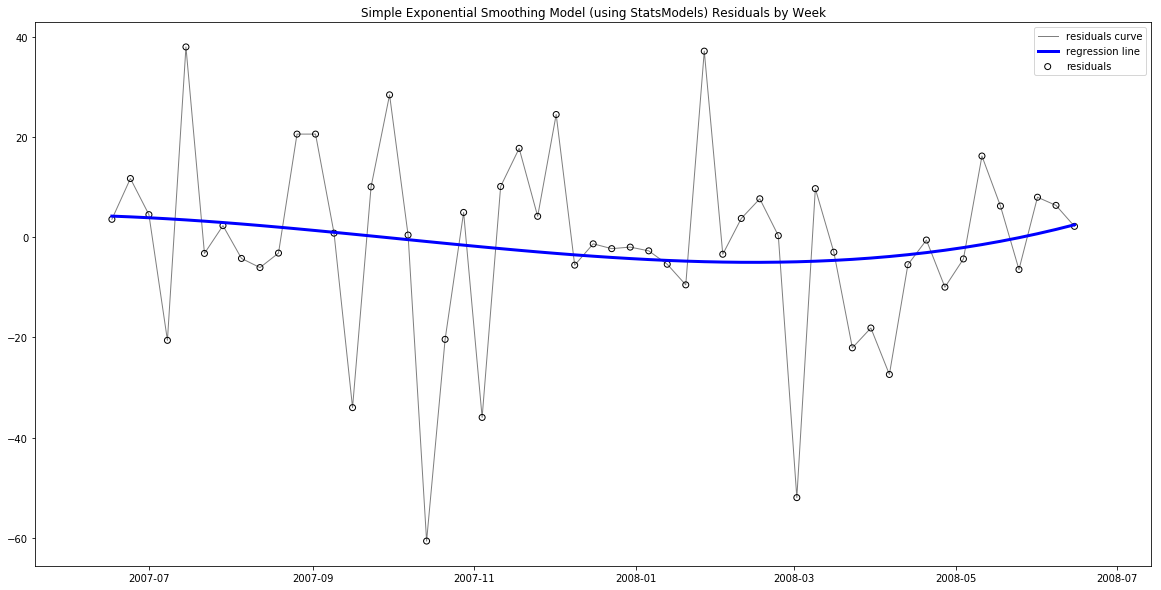

In [17]:
plt.figure(figsize=(20, 10))
plt.title('Simple Exponential Smoothing Model (using StatsModels) Residuals by Week')
plt.scatter(train_ts_df.index.values, residuals, color='black', marker='o', label='residuals', facecolors='none')
plt.plot(train_ts_df.index.values, residuals, color='black', linewidth=1, label='residuals curve', alpha=.5)
plt.plot(train_ts_df.index.values, holt_res_pred, color='blue', linewidth=3, label='regression line')
plt.legend()
plt.show()

### Manually Adjust Apha and Beta 

In [18]:
# smoothing level = alpha (level), smoothing slope = beta (growth rate)
holt1_train = sm.tsa.Holt(train_ts_df['ln GRP'].values, exponential=True, damped=False).fit(smoothing_level=.8, smoothing_slope=.1, damping_slope=.1, optimized=False)
holt1_train

In [19]:
holt1_train.params

{'damping_slope': nan,
 'initial_level': 5.4955275358357421,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 1.0140748396706736,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.8,
 'smoothing_seasonal': None,
 'smoothing_slope': 0.1,
 'use_boxcox': False}

In [20]:
train_ts_df['holt1'] = np.exp(holt1_train.predict(0, len(train_ts_df)-1))
train_ts_df.head()

,week,GRPRatingsDate,GRP,ln GRP,holt,holt1
weekly_date,,,,,,
2007-06-17,0,17-Jun-2007 (25),243.60,5.495528,240.013393,263.190000
2007-06-24,1,24-Jun-2007 (26),263.19,5.572876,251.464691,265.697478
2007-07-01,2,01-Jul-2007 (27),269.89,5.598014,265.373044,283.210997
2007-07-08,3,08-Jul-2007 (28),252.88,5.532915,273.451519,291.667315
2007-07-15,4,15-Jul-2007 (29),303.46,5.715250,265.470810,275.210674


In [21]:
train_ts_df.tail()

,week,GRPRatingsDate,GRP,ln GRP,holt,holt1
weekly_date,,,,,,
2008-05-18,48,18-May-2008 (21),227.32,5.426359,221.081731,222.005149
2008-05-25,49,25-May-2008 (22),218.16,5.385229,224.598040,224.942879
2008-06-01,50,01-Jun-2008 (23),228.92,5.433373,220.924157,217.710944
2008-06-08,51,08-Jun-2008 (24),231.79,5.445832,225.423558,225.684792
2008-06-15,52,15-Jun-2008 (25),231.19,5.443240,229.012094,230.080617


In [22]:
holt1_test = sm.tsa.Holt(test_ts_df['ln GRP'].values,
                        exponential=True,
                        damped=False).fit(smoothing_level=holt1_train.params['smoothing_level'],
                                         smoothing_slope=holt1_train.params['smoothing_slope'],
                                         damping_slope=holt1_train.params['damping_slope'],
                                         optimized=False)
holt1_test

In [23]:
holt1_test.params

{'damping_slope': nan,
 'initial_level': 5.3674702252363531,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 1.0161760977001439,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.8,
 'smoothing_seasonal': None,
 'smoothing_slope': 0.1,
 'use_boxcox': False}

In [24]:
test_ts_df['holt1'] = np.exp(holt1_test.predict(start=0, end=len(test_ts_df)-1))
test_ts_df.head()

,week,GRPRatingsDate,GRP,ln GRP,holt,holt-outofsample,holt1
weekly_date,,,,,,,
2008-06-22,53,22-Jun-2008 (26),214.32,5.367470,224.289439,230.244621,233.760000
2008-06-29,54,29-Jun-2008 (27),233.76,5.454295,225.924552,230.244621,236.269320
2008-07-06,55,06-Jul-2008 (28),231.12,5.442937,235.970829,230.244622,253.856089
2008-07-13,56,13-Jul-2008 (29),224.72,5.414855,237.337819,230.244622,253.307507
2008-07-20,57,20-Jul-2008 (30),216.19,5.376158,233.036761,230.244622,245.147638


In [25]:
test_ts_df['holt1-outofsample'] = np.exp(holt1_train.predict(start=len(train_ts_df), end=len(train_ts_df) + len(test_ts_df)-1))
test_ts_df.head()

,week,GRPRatingsDate,GRP,ln GRP,holt,holt-outofsample,holt1,holt1-outofsample
weekly_date,,,,,,,,
2008-06-22,53,22-Jun-2008 (26),214.32,5.367470,224.289439,230.244621,233.760000,230.580164
2008-06-29,54,29-Jun-2008 (27),233.76,5.454295,225.924552,230.244621,236.269320,230.193400
2008-07-06,55,06-Jul-2008 (28),231.12,5.442937,235.970829,230.244622,253.856089,229.807405
2008-07-13,56,13-Jul-2008 (29),224.72,5.414855,237.337819,230.244622,253.307507,229.422175
2008-07-20,57,20-Jul-2008 (30),216.19,5.376158,233.036761,230.244622,245.147638,229.037710


In [26]:
holt1_train_mse = mean_squared_error(train_ts_df['GRP'].values, train_ts_df['holt1'].values)
holt1_train_rmse = np.sqrt(holt_train_mse)
holt1_test_mse = mean_squared_error(test_ts_df['GRP'].values, test_ts_df['holt1'].values)
holt1_test_rmse = np.sqrt(holt1_test_mse)

results_list.append([holt1_train_mse, holt1_train_rmse, holt1_test_mse, holt1_test_rmse])

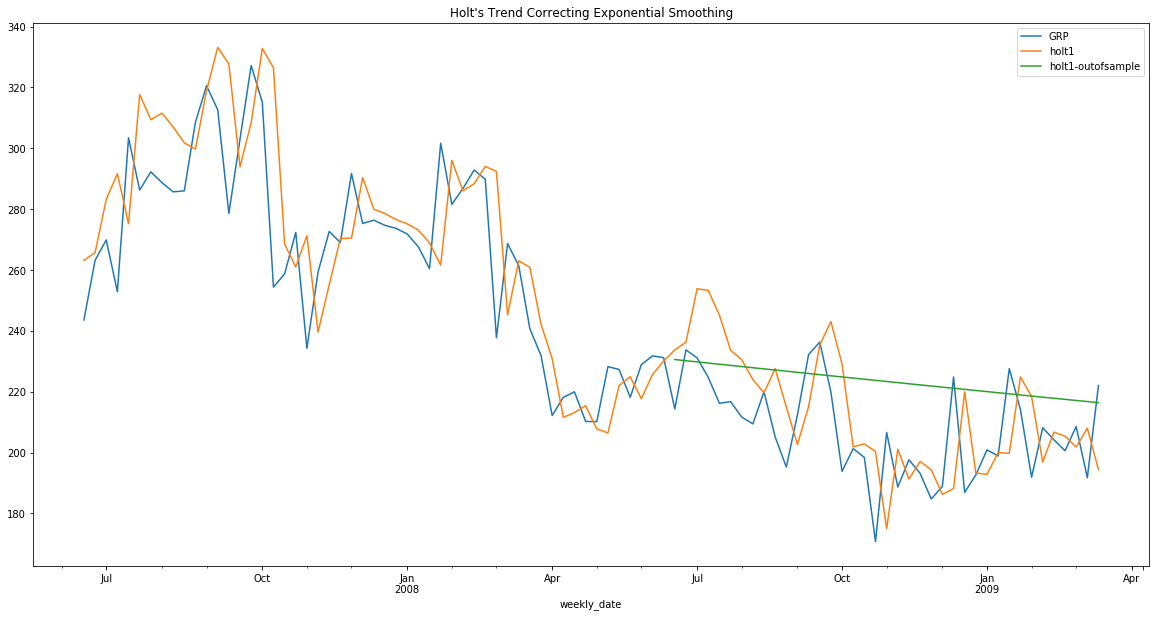

In [27]:
new_ts_df = train_ts_df.append(test_ts_df)
new_ts_df[['GRP', 'holt1', 'holt1-outofsample']].plot(figsize=(20, 10), title="Holt's Trend Correcting Exponential Smoothing")

## Additive Holt-Winters Method (three parameters)

### Reload the Data

In [28]:
# This is the seasonal period used in the model
FREQ = 20

train_ts_df = pd.read_csv('data/transformedTrainRatings.csv', index_col=0, parse_dates=True)
train_ts_df['ln GRP'] = np.log(train_ts_df['GRP'])

test_ts_df = pd.read_csv('data/transformedTestRatings.csv', index_col=0, parse_dates=True)
# Add last 20 observations (number of periods in a season) from the
test_ts_df['ln GRP'] = np.log(test_ts_df['GRP'])

### Decompose the time series data into its trend, seasonality and residual components.

In [29]:
train_ts_df.head()

,week,GRPRatingsDate,GRP,ln GRP
weekly_date,,,,
2007-06-17,0,17-Jun-2007 (25),243.60,5.495528
2007-06-24,1,24-Jun-2007 (26),263.19,5.572876
2007-07-01,2,01-Jul-2007 (27),269.89,5.598014
2007-07-08,3,08-Jul-2007 (28),252.88,5.532915
2007-07-15,4,15-Jul-2007 (29),303.46,5.715250


We use the 5 month (5 x 4 = 20 periods) season from the dummy variable linear regression.

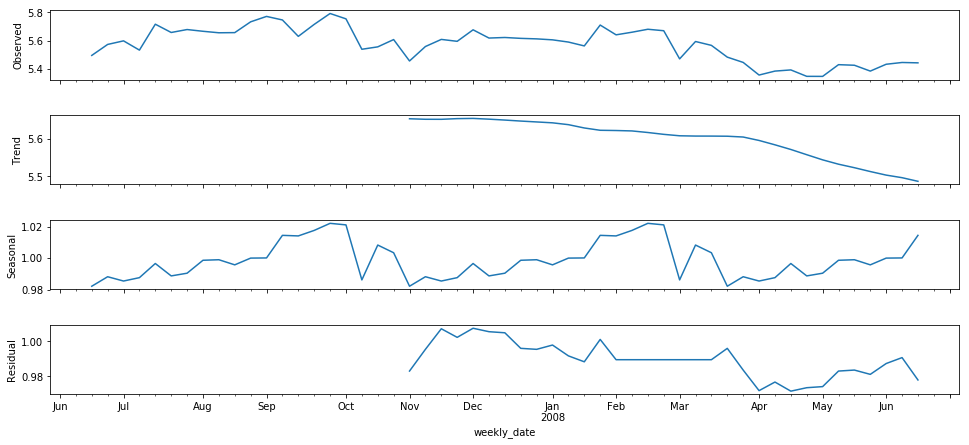

In [30]:
comp = sm.tsa.seasonal_decompose(train_ts_df['ln GRP'], model='multiplicative', two_sided=False, freq=FREQ)
fig = comp.plot()
fig.set_size_inches(15, 7)
plt.show()

In [31]:
# *** Using multiplicative and damped=True produces errors. ***
hw_train = sm.tsa.ExponentialSmoothing(train_ts_df['ln GRP'], trend="additive", damped=False, seasonal="additive", seasonal_periods=FREQ).fit(optimized=True)
hw_train

/home/tkokkeng/Documents/KE5108/TimeSeries/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


In [32]:
hw_train.params

{'damping_slope': nan,
 'initial_level': 5.4492403319112013,
 'initial_seasons': array([ 0.05539244,  0.10720531,  0.10721818,  0.09487428,  0.18999006,
         0.14081695,  0.1535766 ,  0.17961583,  0.17826637,  0.16737703,
         0.20830939,  0.22088114,  0.26548462,  0.18365628,  0.2406214 ,
         0.295108  ,  0.27682781,  0.0764365 ,  0.1518785 ,  0.16971785]),
 'initial_slope': 0.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.78519886839791331,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 0.013749971501891386,
 'use_boxcox': False}

In [33]:
train_ts_df['hw'] = np.exp(hw_train.predict(0, len(train_ts_df)-1))
train_ts_df.head()

,week,GRPRatingsDate,GRP,ln GRP,hw
weekly_date,,,,,
2007-06-17,0,17-Jun-2007 (25),243.60,5.495528,245.828164
2007-06-24,1,24-Jun-2007 (26),263.19,5.572876,257.031313
2007-07-01,2,01-Jul-2007 (27),269.89,5.598014,261.899356
2007-07-08,3,08-Jul-2007 (28),252.88,5.532915,264.991225
2007-07-15,4,15-Jul-2007 (29),303.46,5.715250,280.916182


In [34]:
train_ts_df.tail()

,week,GRPRatingsDate,GRP,ln GRP,hw
weekly_date,,,,,
2008-05-18,48,18-May-2008 (21),227.32,5.426359,224.553012
2008-05-25,49,25-May-2008 (22),218.16,5.385229,223.693452
2008-06-01,50,01-Jun-2008 (23),228.92,5.433373,227.854860
2008-06-08,51,08-Jun-2008 (24),231.79,5.445832,230.940558
2008-06-15,52,15-Jun-2008 (25),231.19,5.443240,241.508355


In [35]:
# Add the last train observation to test dataset to make it 40 observations. Less than this fitting the exponential smoothing breaks.
cols = test_ts_df.columns.tolist()
a_test_ts_df = pd.concat([train_ts_df[len(train_ts_df) - 1:], test_ts_df])
a_test_ts_df = a_test_ts_df[cols]
a_test_ts_df.head()

,week,GRPRatingsDate,GRP,ln GRP
weekly_date,,,,
2008-06-15,52,15-Jun-2008 (25),231.19,5.443240
2008-06-22,53,22-Jun-2008 (26),214.32,5.367470
2008-06-29,54,29-Jun-2008 (27),233.76,5.454295
2008-07-06,55,06-Jul-2008 (28),231.12,5.442937
2008-07-13,56,13-Jul-2008 (29),224.72,5.414855


In [36]:
hw_test = sm.tsa.ExponentialSmoothing(a_test_ts_df['ln GRP'], trend="additive", damped=False,
                                      seasonal="additive", seasonal_periods=FREQ).fit(
    smoothing_level=hw_train.params['smoothing_level'],
    smoothing_slope=hw_train.params['smoothing_slope'],
    smoothing_seasonal=hw_train.params['smoothing_seasonal'],
    damping_slope=hw_train.params['damping_slope'],
    optimized=False)
a_test_ts_df['hw'] = np.exp(hw_test.predict(0, len(a_test_ts_df) - 1))
a_test_ts_df.head()


/home/tkokkeng/Documents/KE5108/TimeSeries/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


,week,GRPRatingsDate,GRP,ln GRP,hw
weekly_date,,,,,
2008-06-15,52,15-Jun-2008 (25),231.19,5.443240,230.530336
2008-06-22,53,22-Jun-2008 (26),214.32,5.367470,213.583932
2008-06-29,54,29-Jun-2008 (27),233.76,5.454295,232.936651
2008-07-06,55,06-Jul-2008 (28),231.12,5.442937,230.310367
2008-07-13,56,13-Jul-2008 (29),224.72,5.414855,223.942193


In [37]:
a_test_ts_df['hw-outofsample'] = np.exp(hw_train.predict(start=len(train_ts_df)-1, end=len(train_ts_df) + len(a_test_ts_df)-2))
a_test_ts_df.head()

,week,GRPRatingsDate,GRP,ln GRP,hw,hw-outofsample
weekly_date,,,,,,
2008-06-15,52,15-Jun-2008 (25),231.19,5.443240,230.530336,241.508355
2008-06-22,53,22-Jun-2008 (26),214.32,5.367470,213.583932,214.342815
2008-06-29,54,29-Jun-2008 (27),233.76,5.454295,232.936651,226.179245
2008-07-06,55,06-Jul-2008 (28),231.12,5.442937,230.310367,238.078491
2008-07-13,56,13-Jul-2008 (29),224.72,5.414855,223.942193,233.015793


In [38]:
hw_train_mse = mean_squared_error(train_ts_df['GRP'].values, train_ts_df['hw'].values)
hw_train_rmse = np.sqrt(hw_train_mse)
hw_test_mse = mean_squared_error(a_test_ts_df['GRP'].values, a_test_ts_df['hw'].values)
hw_test_rmse = np.sqrt(hw_test_mse)

results_list.append([hw_train_mse, hw_train_rmse, hw_test_mse, hw_test_rmse])

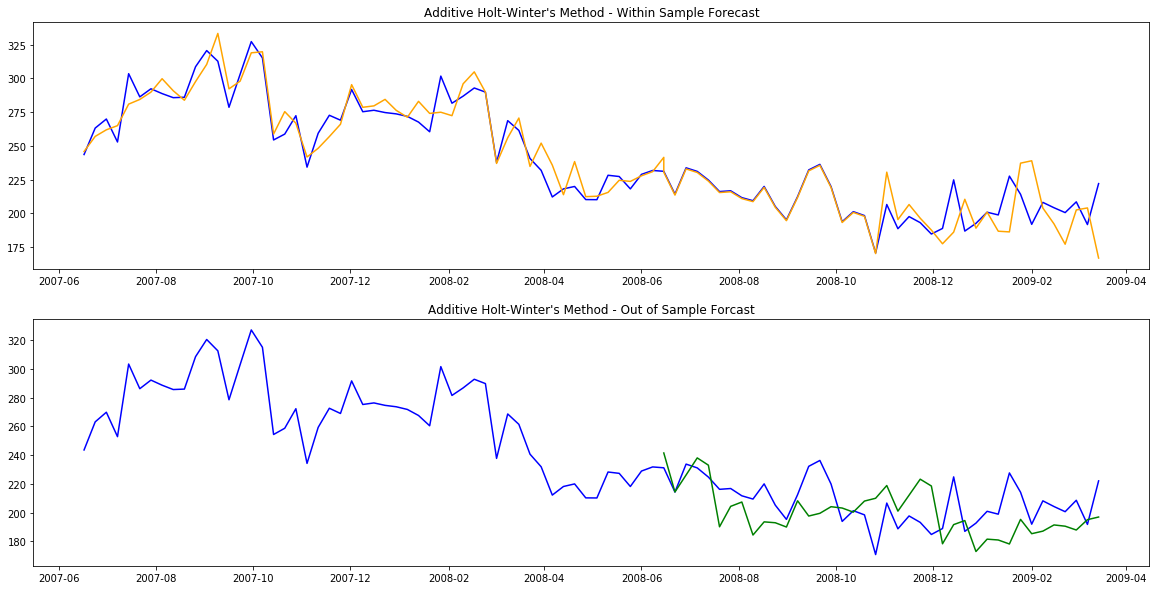

In [39]:
new_ts_df = train_ts_df.append(a_test_ts_df)

plt.figure(figsize=(20, 10))
plt.subplot(211)
plt.plot(new_ts_df['GRP'], color='blue')
plt.plot(new_ts_df['hw'], color='orange')
plt.title("Additive Holt-Winter's Method - Within Sample Forecast")
plt.subplot(212)
plt.plot(new_ts_df['GRP'], color='blue')
plt.plot(new_ts_df['hw-outofsample'], color='green')
plt.title("Additive Holt-Winter's Method - Out of Sample Forcast")
plt.show()

In [40]:
residuals = train_ts_df['GRP'].values - train_ts_df['hw']
residuals[:10]

weekly_date
2007-06-17    -2.228164
2007-06-24     6.158687
2007-07-01     7.990644
2007-07-08   -12.111225
2007-07-15    22.543818
2007-07-22     1.911640
2007-07-29     2.474987
2007-08-05   -11.015113
2007-08-12    -5.124646
2007-08-19     2.215647
Name: hw, dtype: float64

In [41]:
hw_res = Pipeline(
    [
        ('poly', PolynomialFeatures(degree=3)),
        ('linear', LinearRegression(fit_intercept=False))])
hw_res.fit(train_ts_df['week'].values.reshape(-1, 1), residuals)
hw_res_pred = hw_res.predict(train_ts_df['week'].values.reshape(-1, 1))

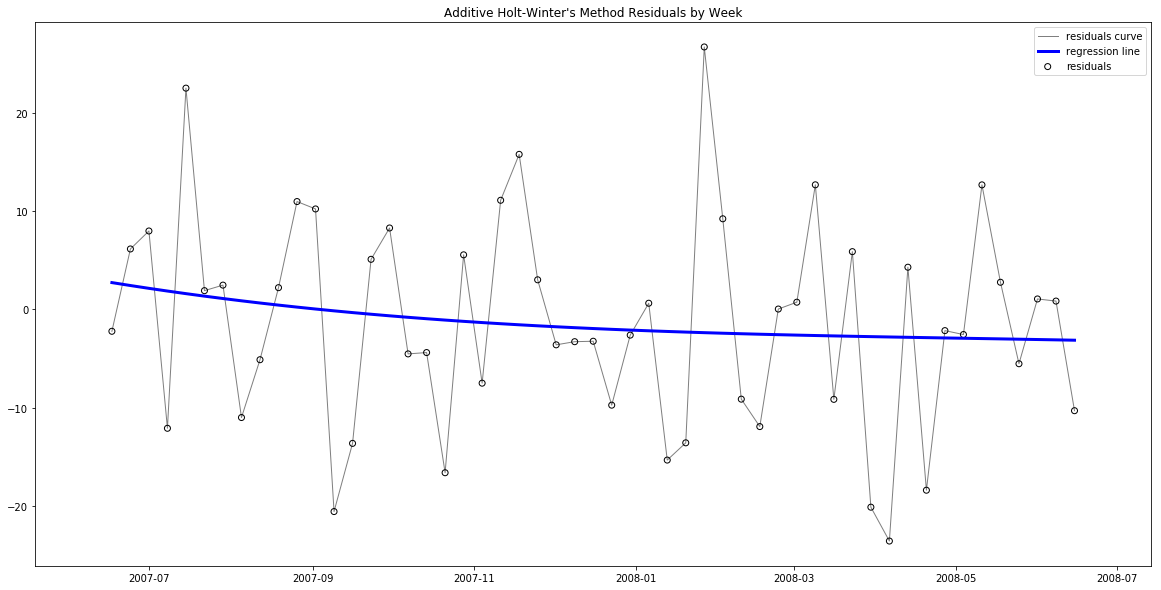

In [42]:

plt.figure(figsize=(20, 10))
plt.title("Additive Holt-Winter's Method Residuals by Week")
plt.scatter(train_ts_df.index.values, residuals, color='black', marker='o', label='residuals', facecolors='none')
plt.plot(train_ts_df.index.values, residuals, color='black', linewidth=1, label='residuals curve', alpha=.5)
plt.plot(train_ts_df.index.values, hw_res_pred, color='blue', linewidth=3, label='regression line')
plt.legend()
plt.show()

## Conclusion

In [43]:
results_df = pd.DataFrame(results_list,
                          index=["Holt's Trend Corrected Exponential Smoothing (StatsModels Optimised)",
                                 "Holt's Trend Corrected Exponential Smoothing (Manually Adjusted)",
                                 "Additive Holt's & Winter's Method"
                                 ],
                          columns=['train mse', 'train rmse', 'test mse', 'test rmse'])
results_df

,train mse,train rmse,test mse,test rmse
Holt's Trend Corrected Exponential Smoothing (StatsModels Optimised),341.072599,18.468151,230.435368,15.180098
Holt's Trend Corrected Exponential Smoothing (Manually Adjusted),461.500239,18.468151,359.170349,18.951790
Additive Holt's & Winter's Method,115.933541,10.767244,286.417517,16.923874
